# OLYMPICS ANALYSIS

###### SAI MANOJ JAYAKANNAN

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import pylab as plt
import os
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(16,12)})

In [4]:
os.getcwd()

'C:\\Users\\sjayakannan'

In [8]:
os.chdir(r'C:\Users\sjayakannan\Documents\AV\Olympic Events')

In [9]:
data = pd.read_csv("athlete_events.csv")

In [10]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [12]:
data.shape

(271116, 15)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


ID is the Unique indentifier of every participant.

NOC is the National Olympic committe of their country.

Team is the name of team that participated, generally it is name of country, but it might have old country names/ countries before partition etc and most importantly it ha team names of individual participants also

In [18]:
print("Number of Nations participated:", len(data.NOC.unique()))
print("Number of Teams participated",len(data.Team.unique()))

Number of Nations participated: 230
Number of Teams participated 1184


In [20]:
data.Team.value_counts().tail()

Camille     1
Floresco    1
Bremen      1
Femur-1     1
Digby       1
Name: Team, dtype: int64

In [21]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

###### Age, Height and Weight have not been recorded properly.
###### Medal having so many Nulls is fathomable coz not all the participants get a medal

In [23]:
data.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [25]:
print("Total number of Unique players participated in Olympics:",len(data.ID.unique()))

Total number of Unique players participated in Olympics: 135571


###### So its evident that a player could be participating in mutliple events

In [27]:
data.Season.unique()

array(['Summer', 'Winter'], dtype=object)

In [32]:
np.array(sorted(data[data['Season']== 'Summer']['Year'].unique()))

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016], dtype=int64)

In [33]:
np.array(sorted(data[data['Season']== 'Winter']['Year'].unique()))

array([1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972,
       1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014],
      dtype=int64)

In [39]:
GroupedYearID = data.groupby(['Year','ID'],as_index=False).count()[['Year','ID']]

In [41]:
GroupedYearID = GroupedYearID.groupby('Year',as_index=False).count()

In [42]:
GroupedYearID.head()

,Year,ID
0,1896,176
1,1900,1224
2,1904,650
3,1906,841
4,1908,2024


In [44]:
l = []
for i in [1994,1998,2002,2006,2010,2014]: #The year of winter olympics
    l.append(GroupedYearID[GroupedYearID.Year == i].index[0])

In [48]:

for i in l:
    GroupedYearID.loc[i,'Year'] = GroupedYearID.loc[i,'Year'] +2

In [52]:
GroupedYearID  = GroupedYearID.groupby('Year',as_index=False).sum()

##### Observation from Summer and Winter olympics:
##### >Summer olypics began in 1896 while winter in 1924
##### >Olympics format change after 1992- Winter olympics are held 2 years prior
##### >So aggregating winter olympics count after 1992 to its successive summer olympics


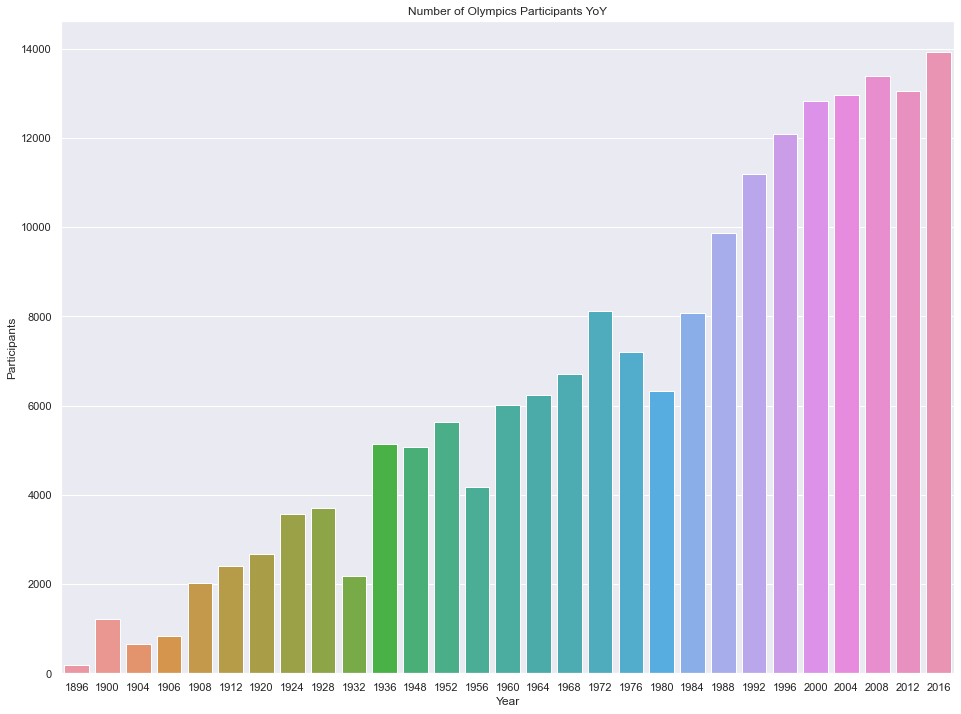

In [57]:
sns.barplot('Year','ID', data = GroupedYearID)
plt.xlabel("Year")
plt.ylabel("Participants")
plt.title("Number of Olympics Participants YoY")
plt.show()

In [66]:
groupedGender = pd.concat([data,pd.get_dummies(data.Sex)],axis=1).groupby(['Year','ID'],as_index = False).sum()

In [67]:
groupedGender.head()

,Year,ID,Age,Height,Weight,F,M
0,1896,1724,0.0,0.0,0.0,0,2
1,1896,1725,0.0,0.0,0.0,0,2
2,1896,4113,0.0,0.0,0.0,0,1
3,1896,4116,0.0,0.0,0.0,0,1
4,1896,4189,0.0,0.0,0.0,0,1


In [68]:
groupedGender.F = groupedGender.F.apply(lambda x: 0 if x==0 else 1)
groupedGender.M = groupedGender.M.apply(lambda x: 0 if x==0 else 1)

In [69]:
groupedGender.head()

,Year,ID,Age,Height,Weight,F,M
0,1896,1724,0.0,0.0,0.0,0,1
1,1896,1725,0.0,0.0,0.0,0,1
2,1896,4113,0.0,0.0,0.0,0,1
3,1896,4116,0.0,0.0,0.0,0,1
4,1896,4189,0.0,0.0,0.0,0,1


In [70]:
groupedGender = groupedGender.groupby('Year',as_index=False).sum()

In [72]:
groupedGender[['Year','ID','F','M']].head()

,Year,ID,F,M
0,1896,12297155,0,176
1,1900,75171861,23,1201
2,1904,44406211,6,644
3,1906,58625020,6,835
4,1908,133836822,44,1980


In [73]:
for i in l:
    groupedGender.loc[i,'Year'] = groupedGender.loc[i,'Year'] +2

In [74]:
groupedGender = groupedGender.groupby('Year',as_index=False).sum()

In [76]:
groupedGender[['Year','ID','F','M']].head()

,Year,ID,F,M
0,1896,12297155,0,176
1,1900,75171861,23,1201
2,1904,44406211,6,644
3,1906,58625020,6,835
4,1908,133836822,44,1980


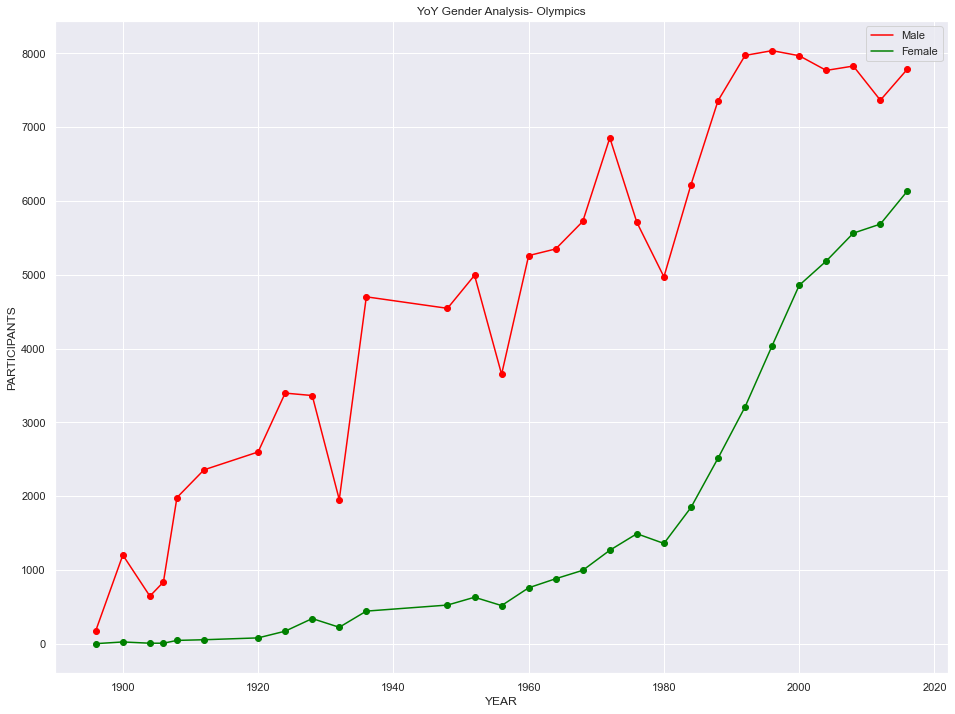

In [78]:
plt.plot(groupedGender.Year,groupedGender.M,color='red')
plt.plot(groupedGender.Year,groupedGender.F,color='green')

plt.plot(groupedGender.Year,groupedGender.M,'bo',color='red')
plt.plot(groupedGender.Year,groupedGender.F,'bo',color ='green')

plt.legend(['Male','Female'])
plt.xlabel("YEAR")
plt.ylabel("PARTICIPANTS")
plt.title("YoY Gender Analysis- Olympics")
plt.show()

In [80]:
data = pd.concat([data,pd.get_dummies(data.Medal)],axis=1)

In [81]:
data['allmedals']  = data['Bronze'] + data['Gold'] + data['Silver'] 

In [82]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,0,0


In [83]:
groupedcountry = data.groupby(by=['NOC'],as_index= False).sum()

In [85]:
top50 = groupedcountry.sort_values(by=['allmedals'],ascending = False).head(50)

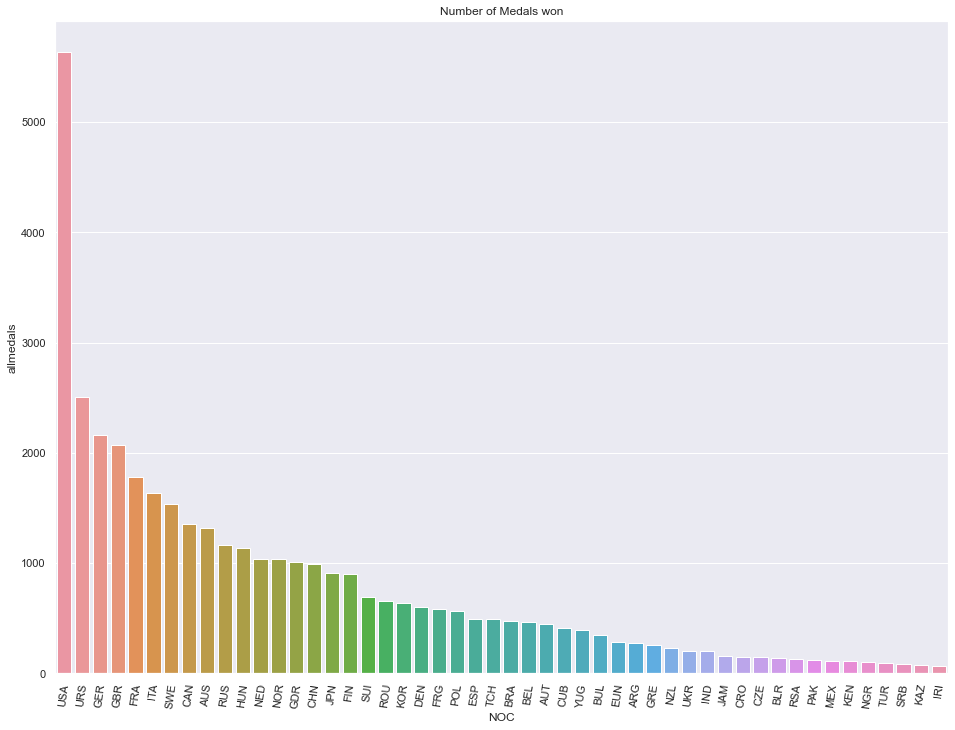

In [92]:
sns.barplot('NOC','allmedals',data=top50).set_xticklabels(top50.NOC,rotation=82)
plt.title("Number of Medals won")
plt.show()

In [93]:
groupYearNOC = data.groupby(by=['Year','NOC'],as_index=False).sum()

In [94]:
l1 = []
for i in [1994,1998,2002,2006,2010,2014]: #The year of winter olympics
    l1.append(np.array(groupYearNOC[groupYearNOC.Year == i].index))

In [95]:
for i in l1:
    groupYearNOC.loc[i,'Year'] = groupYearNOC.loc[i,'Year'] +2

In [96]:
groupYearNOC = groupYearNOC.groupby(by=['Year','NOC'],as_index=False).sum()

In [98]:
yeartop = pd.DataFrame() 
y = data.Year.unique() #Gets the Year numbers
for i in y:
    yeartop = pd.concat([yeartop,groupYearNOC[groupYearNOC['Year'] == i].sort_values(by=['allmedals'],ascending= False).head(1)])

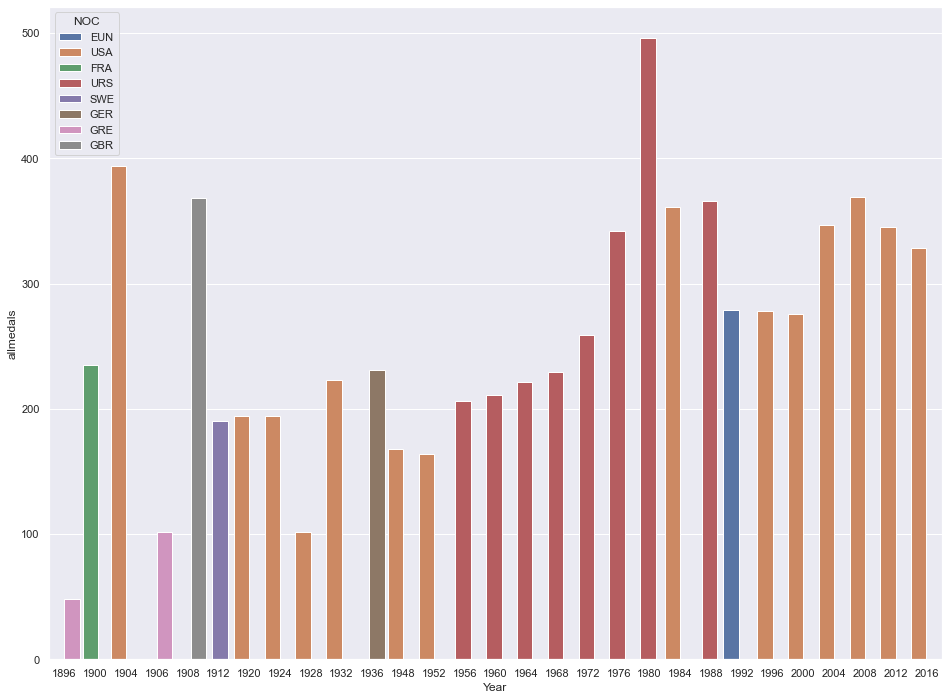

In [101]:
fig, ax = plt.subplots()
sns.barplot('Year','allmedals',hue='NOC',data = yeartop,ax=ax)


def change_width(ax, new_value) : ### STACKOVERFLOW
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .50)
plt.show()

In [102]:
groupedSport = data.groupby(by=['Sport','NOC'],as_index=False).sum()

In [104]:
TopSports = pd.DataFrame()
sp = data.Sport.unique()
for i in sp:
    TopSports = pd.concat([TopSports,groupedSport[groupedSport['Sport'] == i].sort_values(by=['allmedals'],ascending= False).head(1)])

In [105]:
TopSports = TopSports[['Sport','NOC','Bronze','Gold','Silver','allmedals']]
TopSports.head()

,Sport,NOC,Bronze,Gold,Silver,allmedals
632,Basketball,USA,36.0,281.0,24.0,341.0
2095,Judo,JPN,26.0,39.0,19.0,84.0
1626,Football,BRA,34.0,17.0,85.0,136.0
3612,Tug-Of-War,GBR,8.0,16.0,16.0,40.0
2964,Speed Skating,NED,41.0,40.0,36.0,117.0


In [114]:
np.array(TopSports[TopSports['NOC'] == 'USA']['Sport'])

array(['Basketball', 'Athletics', 'Swimming', 'Wrestling', 'Rowing',
       'Shooting', 'Boxing', 'Diving', 'Figure Skating', 'Golf',
       'Freestyle Skiing', 'Snowboarding', 'Skeleton', 'Roque'],
      dtype=object)

In [115]:
data.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [116]:
GroupedAge = data.groupby(['Year','ID'],as_index=False).mean()

In [117]:
GroupedAge.head()

,Year,ID,Age,Height,Weight,Bronze,Gold,Silver,allmedals
0,1896,1724,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1896,1725,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1896,4113,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1896,4116,NaN,NaN,NaN,0.0,0.0,1.0,1.0
4,1896,4189,NaN,NaN,NaN,0.0,1.0,0.0,1.0


In [118]:
GroupedAge = GroupedAge[np.isfinite(GroupedAge['Age'])]

In [119]:
GroupedAge.head()

,Year,ID,Age,Height,Weight,Bronze,Gold,Silver,allmedals
11,1896,12068,24.0,NaN,NaN,0.0,0.000000,0.5,0.500000
12,1896,12563,25.0,NaN,NaN,0.0,0.285714,0.0,0.285714
13,1896,12929,25.0,NaN,NaN,0.0,1.000000,0.0,1.000000
14,1896,16616,21.0,183.0,66.0,0.0,1.000000,0.0,1.000000
15,1896,17492,20.0,NaN,NaN,0.0,0.000000,1.0,1.000000


In [120]:
GroupedAge = GroupedAge.groupby('Year',as_index= False).mean()

In [123]:
GroupedAge[['Year','Age']].head()

,Year,Age
0,1896,23.138889
1,1900,28.268025
2,1904,26.850299
3,1906,25.614796
4,1908,26.860117


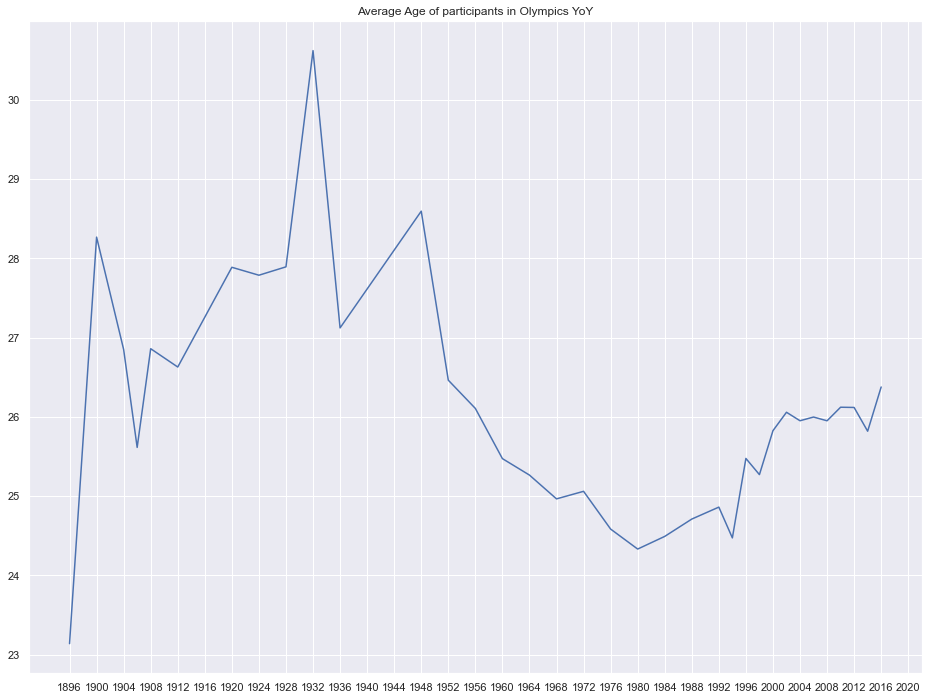

In [124]:
plt.plot(GroupedAge.Year,GroupedAge.Age)
plt.xticks(range(1896,2024,4))
plt.title("Average Age of participants in Olympics YoY")
plt.show()

In [128]:
dfagesport = data.groupby(['Sport','ID'],as_index=False).mean()

In [129]:
dfagesport = dfagesport.groupby(['Sport'],as_index=False).mean()

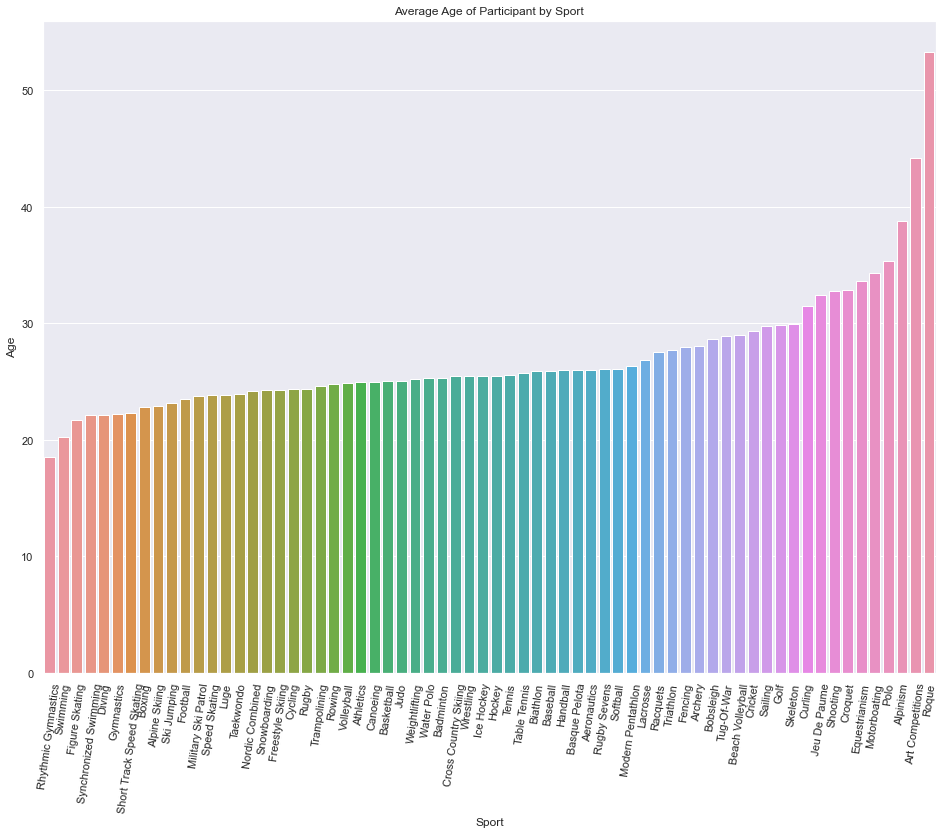

In [132]:
sns.barplot('Sport','Age',data = dfagesport.sort_values('Age')).set_xticklabels(dfagesport.sort_values('Age').Sport,rotation=82)
plt.title("Average Age of Participant by Sport")
plt.show()

In [134]:
dfheight = dfagesport[np.isfinite(dfagesport['Height'])]

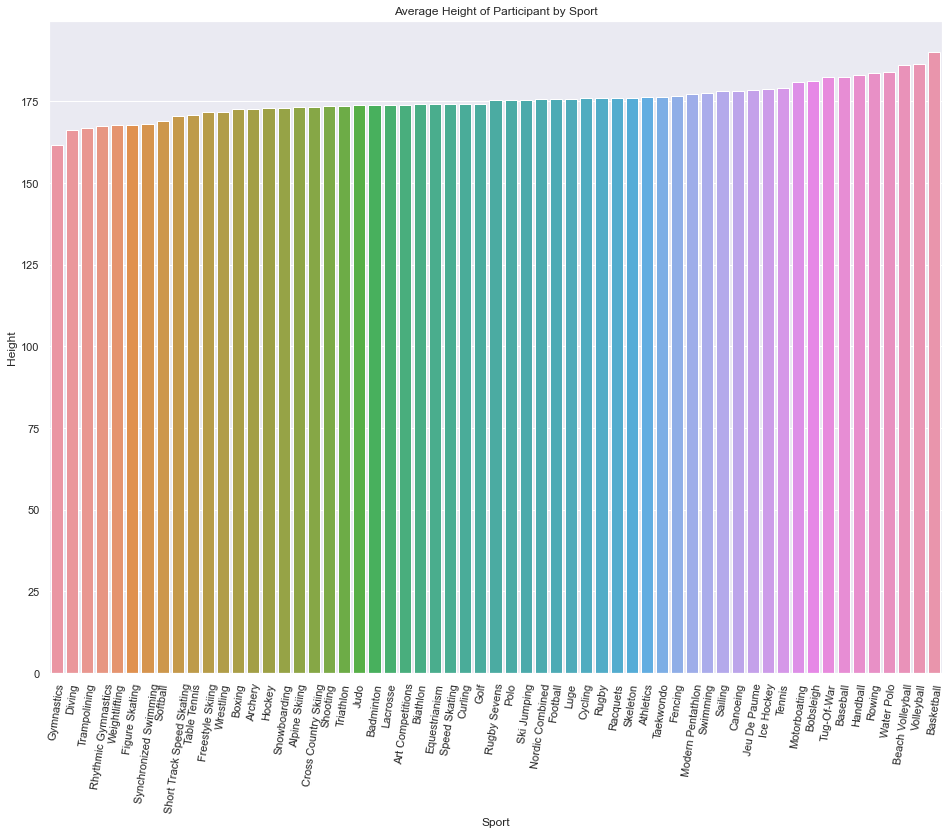

In [137]:
sns.barplot('Sport','Height',data = dfheight.sort_values('Height')).set_xticklabels(dfheight.sort_values('Height').Sport,rotation=82)
plt.title("Average Height of Participant by Sport")
plt.show()

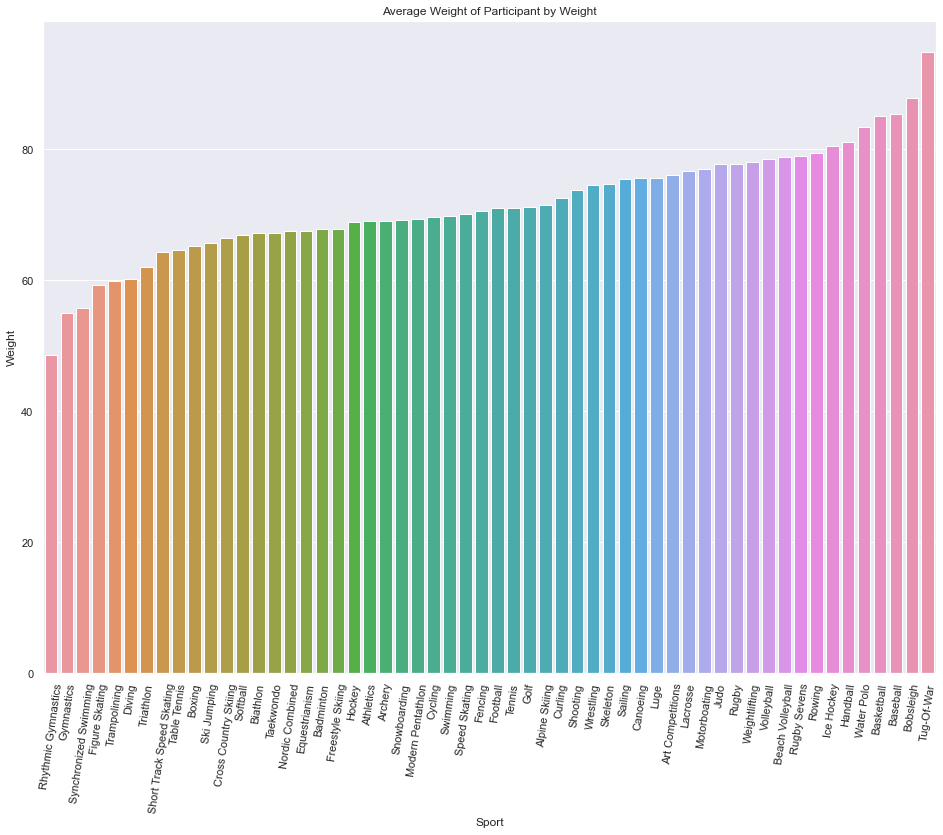

In [139]:
dfweight = dfagesport[np.isfinite(dfagesport['Weight'])]
sns.barplot('Sport','Weight',data = dfweight.sort_values('Weight')).set_xticklabels(dfweight.sort_values('Weight').Sport,rotation=82)
plt.title("Average Weight of Participant by Weight")
plt.show()

In [140]:
data[data.Age ==data.Age.min()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,1,0,0,1


In [141]:
data[data.Age ==data.Age.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,0,0,0,0


In [142]:
datanoart = data[data.Sport !='Art Competitions']

In [143]:
datanoart[datanoart.Age ==datanoart.Age.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,allmedals
233393,117046,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot",NaN,0,0,0,0
233394,117046,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot, Team",NaN,0,0,0,0
233395,117046,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",Silver,0,0,1,1
254475,127395,Arthur von Pongracz de Szent-Mikls und vr,M,72.0,NaN,NaN,Austria,AUT,1936 Summer,1936,Summer,Berlin,Equestrianism,"Equestrianism Men's Dressage, Individual",NaN,0,0,0,0
254476,127395,Arthur von Pongracz de Szent-Mikls und vr,M,72.0,NaN,NaN,Austria,AUT,1936 Summer,1936,Summer,Berlin,Equestrianism,"Equestrianism Men's Dressage, Team",NaN,0,0,0,0
